In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 as sql
import folium

%matplotlib inline

In [2]:
police_2013 = pd.read_csv('../data/Metro_Nashville_Davidson_County_Calls_For_Police_Service__2013_.csv')

In [3]:
police_2013.shape

(1211710, 19)

In [4]:
police_2013 = police_2013.drop(columns = ['Tencode Suffix Description', 'Tencode Suffix', 'Block', 'Street Name', 'Reporting Area (RPA)', 'Mapped Location'])


In [5]:
# {} creates a dictionary with the :
police_2013 = police_2013.rename(columns = 
                                 {'Event Number': 'id', 'Call Received': 'call_time', 'Complaint Number': 'complaint_id', 'Shift': 'shift', 'Tencode': 'tencode', 'Tencode Description': 'tencode_desc', 'Disposition Code': 'disposition', 'Disposition Description': 'disposition_desc', 'Unit Dispatched': 'unit', 'Sector': 'sector', 'Zone': 'zone', 'Latitude': 'lat', 'Longitude': 'lng'})



# Unit Counts Analysis

In [6]:
police_2013.unit.value_counts().head()

423C    6816
611C    5902
515C    5866
613C    5626
327B    5268
Name: unit, dtype: int64

In [7]:
#looking at police data in 2013 where units took more than 1000 calls
sum(police_2013.unit.value_counts() > 1000)

365

In [8]:
# another way to find values greater than 1000
# sum(police_2013.unit.value_counts())

In [9]:
unit_counts = police_2013.unit.value_counts()
unit_counts

423C     6816
611C     5902
515C     5866
613C     5626
327B     5268
723B     5172
623C     5146
621C     5143
125C     5036
723C     4674
721B     4651
123C     4580
121C     4567
111B     4519
513C     4517
615C     4480
133B     4473
121B     4400
125B     4398
415B     4325
104      4297
713C     4278
413C     4275
123B     4267
119C     4247
725C     4243
411C     4241
113B     4227
517C     4145
715C     4123
         ... 
D55         1
440B        1
1107        1
SNIDE       1
sh820       1
B43         1
26C5        1
1D56A       1
120A1       1
1D52B       1
6F67        1
690b        1
380         1
3603        1
563c9       1
lake3       1
342C        1
1F76        1
2937        1
4S16        1
322B9       1
610C9       1
ss          1
5420        1
4F60        1
1d75a       1
3801        1
D57         1
235BX       1
3253        1
Name: unit, Length: 2529, dtype: int64

In [10]:
#converts to a dataframe instead of a series so I can perform other maths
unit_counts = unit_counts.to_frame()
unit_counts

,unit
423C,6816
611C,5902
515C,5866
613C,5626
327B,5268
723B,5172
623C,5146
621C,5143
125C,5036
723C,4674


In [11]:
unit_counts = unit_counts.reset_index()
unit_counts

,index,unit
0,423C,6816
1,611C,5902
2,515C,5866
3,613C,5626
4,327B,5268
5,723B,5172
6,623C,5146
7,621C,5143
8,125C,5036
9,723C,4674


In [12]:
unit_counts.columns = ['unit', 'count']
unit_counts.head()

,unit,count
0,423C,6816
1,611C,5902
2,515C,5866
3,613C,5626
4,327B,5268


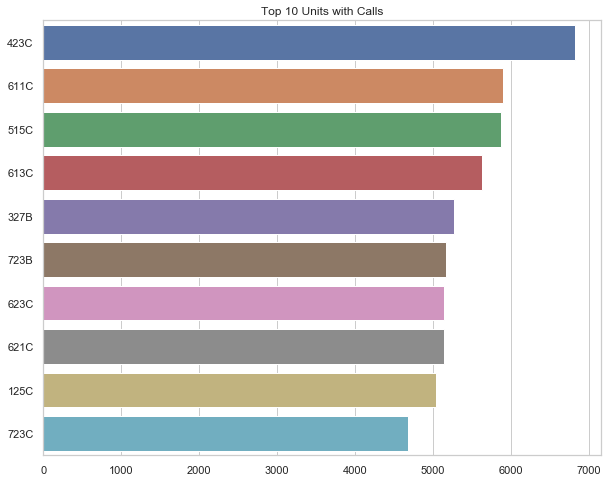

In [13]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
sns.barplot('count', 'unit', data = unit_counts.iloc[:10])
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Units with Calls');

# Unit 423 had the most calls in 2013, 6816. 365 units had more than 1000 calls, most common call was Traffic Violation = 388850 

# tencode_desc analysis

In [14]:
tencode_counts = police_2013.tencode_desc.value_counts()
tencode_counts

Traffic Violation                              388850
Business Check                                 239471
Want Officer for Investigation / Assistance    163571
Community Policing Activity                     51248
Suspicious Person                               47585
Administrative/Special Assignment               43248
Vehicle Accident - Property Damage              32655
Disorderly Person                               32488
Safety Hazard                                   30270
Theft                                           29767
Burglary - Residence                            29400
Burglary - Non-Residence                        21964
Investigate 911 Hang-Up Call                    17006
Meal Break                                      15323
Fight / Assault                                  9415
Vehicle Blocking Right of Way                    8695
Vehicle Accident - Personal Injury               8598
Fixed Post                                       6099
Shots Fired                 

In [15]:
#convert tencode to a dataframe
tencode_counts = tencode_counts.to_frame()

In [16]:
tencode_counts = tencode_counts.reset_index()
tencode_counts.head()

,index,tencode_desc
0,Traffic Violation,388850
1,Business Check,239471
2,Want Officer for Investigation / Assistance,163571
3,Community Policing Activity,51248
4,Suspicious Person,47585


In [17]:
tencode_counts.columns = ['crime', 'count']

In [18]:
tencode_counts = tencode_counts.sort_values(by=['count'], ascending=False)

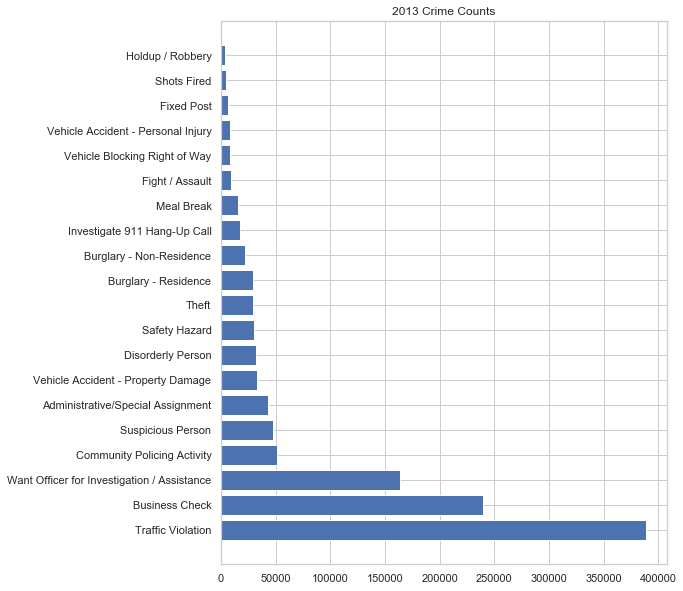

In [19]:
#how to make this descending???
plt.figure(figsize = (8, 10))
plt.barh('crime', 'count', data = tencode_counts.iloc[:20])
plt.title('2013 Crime Counts');

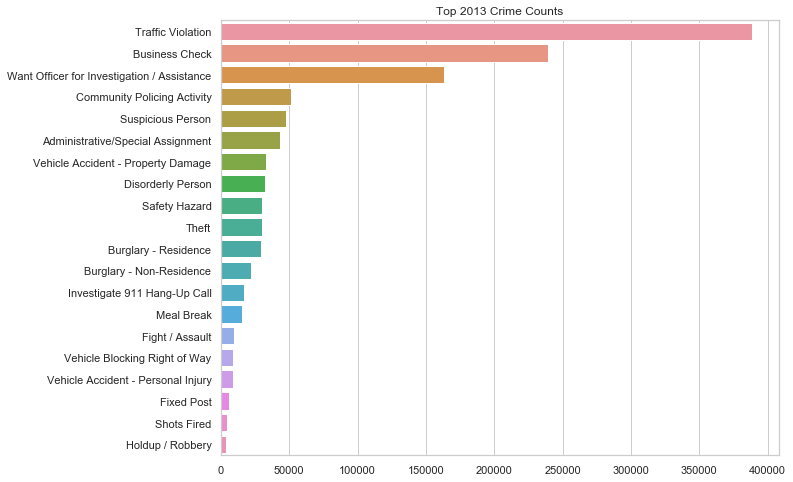

In [20]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
sns.barplot('count', 'crime', data = tencode_counts.iloc[:20])
plt.xlabel('')
plt.ylabel('')
plt.title('Top 2013 Crime Counts');

In [21]:
police_2018 = pd.read_csv('../data/Metro_Nashville_Davidson_County_Calls_For_Police_Service__2018_.csv')


# Reduce Columns for Police_2018

In [22]:
police_2018 = police_2018.drop(columns = ['Tencode Suffix Description', 'Tencode Suffix', 'Block', 'Street Name', 'Reporting Area (RPA)', 'Mapped Location'])

In [23]:
police_2018 = police_2018.rename(columns = 
                                 {'Event Number': 'id', 'Call Received': 'call_time', 'Complaint Number': 'complaint_id', 'Shift': 'shift', 'Tencode': 'tencode', 'Tencode Description': 'tencode_desc', 'Disposition Code': 'disposition', 'Disposition Description': 'disposition_desc', 'Unit Dispatched': 'unit', 'Sector': 'sector', 'Zone': 'zone', 'Latitude': 'lat', 'Longitude': 'lng'})


# Unit Counts 2018

In [24]:
police_2018vc = police_2018.unit.value_counts()
police_2018vc.head()

125C    6200
421C    4983
117C    4084
617C    3375
613C    3356
Name: unit, dtype: int64

In [25]:
police_2018vc[police_2018vc>1000]

125C     6200
421C     4983
117C     4084
617C     3375
613C     3356
423C     3323
215B     3293
113A     3143
117A     3059
123C     3056
611C     2943
125A     2897
227C     2846
225B     2817
811C     2748
221B     2722
221C     2675
423B     2655
213B     2650
815C     2649
111B     2641
217C     2639
121B     2631
121C     2629
813C     2621
227B     2615
831C     2607
111A     2567
413C     2551
121A     2525
         ... 
2933     1156
413A     1154
4F24     1145
8F65     1143
5532     1135
522B     1123
VANDY    1122
323C     1122
2942     1104
4B42     1099
731B     1083
5F21     1080
7F75     1072
332A     1070
5F24     1063
612B     1057
1T73     1052
MAPR     1048
5F13     1047
5F36     1045
SAPR     1044
7T83     1034
3T72     1031
1F44     1027
4M84     1027
4F18     1026
322B     1018
1F62     1010
3F24     1005
3F25     1001
Name: unit, Length: 271, dtype: int64

# Tencode Descrp for 2018

In [26]:
tencode_counts18 = police_2018.tencode_desc.value_counts().to_frame().reset_index()
tencode_counts18.head()

,index,tencode_desc
0,Business Check,156142
1,Traffic Violation,143257
2,Want Officer for Investigation / Assistance,126718
3,Administrative/Special Assignment,41765
4,Community Policing Activity,34511


In [27]:
tencode_counts18.columns = ['crime', 'count']

# Unit 125C, answered 6200 calls
271 units answered more than 1000 calls in 2018
Most common call was Business Check, with 156142 calls


# Find Recent Date on 2018 Data

In [28]:
police_2018['call_time'] = pd.to_datetime(police_2018['call_time'])
max(police_2018['call_time'])

Timestamp('2018-09-21 03:26:56')

In [29]:
#convert date to datetype
police_2013['call_time'] = pd.to_datetime(police_2013['call_time'])
max(police_2013['call_time'])

Timestamp('2013-12-31 23:59:00')

# Remove all dates after 2018 max date on the 2013 data

In [30]:
#df[(df['date'] > '2013-01-01')
calltime13 = police_2013[police_2013['call_time'] < '09/22/2013']
calltime13.call_time.max()

Timestamp('2013-09-21 23:59:00')

# Subset of 2013 data with 5 tencodes: 
Holdup/Robbery
Bank Robbery, 
Burglary - Residence 
Burglary - Non-Residence
Theft



In [31]:
calltime13.columns

Index(['id', 'call_time', 'complaint_id', 'shift', 'tencode', 'tencode_desc',
       'disposition', 'disposition_desc', 'unit', 'sector', 'zone', 'lat',
       'lng'],
      dtype='object')

In [32]:
#This way works, option 1
tencode_filter = calltime13.tencode_desc.isin(["Holdup / Robbery", "Bank Robbery", "Burglary Residence", "Burglary - Non-Residence", "Theft"])
crime_subset_13 = calltime13[tencode_filter]


In [33]:
#This works too, option 2
##tencode_filter13 = ['Holdup / Robbery', 'Bank Robbery', 'Burglary Residence', 'Burglary - Non-Residence', 'Theft']
###calltime13.query('tencode_desc in @tencode_filter')



Add a column named ‘year’ to each of these new subset data frames. Set year to 2013 in the 2013 subset and set year to 2018 in the 2018 subset.

# Create 2018 subset data

In [34]:
tencode_filter = police_2018.tencode_desc.isin(["Holdup / Robbery", "Bank Robbery", "Burglary - Residence", "Burglary - Non-Residence", "Theft"])
crime_subset_18 = police_2018[tencode_filter]


In [35]:
#crime_subset_13 is all 2013 data, not past 9/21/2013, filtered for tencode desc
## crime_subset_18 is for all 2018 data, not past 9/21/2013, filtered for tencode desc

# Add year to 2013 and 2018 subsets

In [36]:

crime_subset_13['year'] = '2013'

/Users/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
#Error settingwithcopywarning but still works?
crime_subset_18['year'] = '2018'

/Users/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Combine the 2013 and 2018 subset data into a single data frame called crimes. Since they have the same columns, you can concatenate the data frames. How many rows and columns are there in the combined data frame?

In [38]:
crimes = pd.concat([crime_subset_13, crime_subset_18])
crimes.tail()

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng,year
747305,PD201800929948,2018-09-20 17:55:34,20180804623,B,50,Theft,1,M.P.D. REPORT COMPLED,113B,NaN,NaN,NaN,NaN,2018
747308,PD201800920182,2018-09-18 04:04:52,20180795807,C,50,Theft,6,ASSISTED OTHER UNIT,517C,NaN,NaN,NaN,NaN,2018
747309,PD201800927918,2018-09-20 06:40:48,0,C,50,Theft,11,DISREGARD / SIGNAL 9,NaN,M,21,36.240,-86.768,2018
747312,PD201800925383,2018-09-19 13:11:12,20180800557,A,50,Theft,1,M.P.D. REPORT COMPLED,727B,NaN,NaN,NaN,NaN,2018
747315,PD201800929713,2018-09-20 16:40:30,0,B,50,Theft,11,DISREGARD / SIGNAL 9,NaN,N,21,36.234,-86.790,2018


# Num 15 crimes Subset has 108,134 rows with 14 columns

In [39]:
crimes.shape

(108302, 14)

In [40]:
crimes.tencode_desc.value_counts()

Theft                       49425
Burglary - Non-Residence    33556
Burglary - Residence        19110
Holdup / Robbery             6025
Bank Robbery                  186
Name: tencode_desc, dtype: int64

# No 16 pandas map function
change the descriptions so there are just three categories: Burglary (includes ‘Burglary - Residence' and 'Burglary - Non-Residence'), Robbery (includes 'Bank Robbery' and 'Holdup / Robbery'), and Theft (includes ‘Theft’). Check the value counts again to confirm your changes.


In [41]:
# .map looks for a value in a column, and replaces with another column

In [42]:
crimes['tencode_desc'] = crimes['tencode_desc'].map({'Burglary - Residence': 'Burglary', 'Burglary - Non-Residence': 'Burglary', 'Bank Robbery': 'Robbery', 'Holdup / Robbery': 'Robbery', 'Theft': 'Theft'})


In [43]:
crimes.tencode_desc.value_counts()

Burglary    52666
Theft       49425
Robbery      6211
Name: tencode_desc, dtype: int64

In [44]:
# reference public art 3
# value counts, move to dataframe, index, print

# No 17 Create aggregated_df Dataframe
Create a data frame called aggregated_df with the year, crime category, and count of calls for the year and category.

In [45]:
aggregated_df = crimes.groupby(['tencode_desc', 'year']).agg('count').reset_index()

In [46]:
#public_art3 reference. Groupby
#use df.grouby([col1, col2])
## use .agg() or .size() to get a count for groups, keep desired columns and drop others
# use df.sort_values() with ascending = False to put the largest value first
 
#aggregated_df = crimes.drop(columns = ['id', 'call_time', 'complaint_id', 'shift', 'tencode', 'disposition', 'disposition_desc', 'unit', 'sector', 'zone', 'lat', 'lng'])

aggregated_df = aggregated_df.iloc[0:,0:3]   
aggregated_df.columns = ['crime_category', 'year', 'crime_count']
aggregated_df = aggregated_df.sort_values('crime_count', ascending = False)
aggregated_df


,crime_category,year,crime_count
1,Burglary,2018,36720
5,Theft,2018,27392
4,Theft,2013,22033
0,Burglary,2013,15946
3,Robbery,2018,3212
2,Robbery,2013,2999


# 2- 18 
Plot a Seaborn facet grid to compare the 2013 and 2018 count of crimes for each category. Has any category changed significantly from 2013 to 2018?

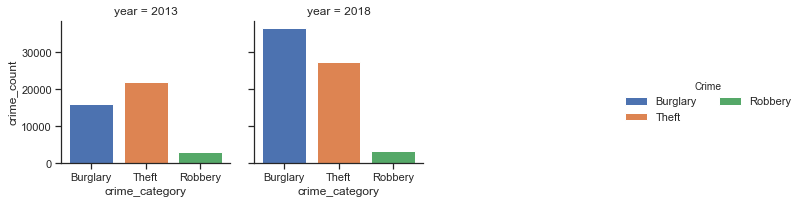

In [47]:
sns.set(style="ticks")
# Initialize a grid of plots with a column for each art type
grid = sns.FacetGrid(aggregated_df, 
                     col="year", hue="crime_category", col_wrap=3)

# Draw a plot to show the trajectory of each country
grid.map(plt.bar, "crime_category", "crime_count")
grid.add_legend(ncol = 2, title = 'Crime');


# 2-20 
Which sector had the least number of calls for 2013? How many calls? What about 2018?

In [48]:
calltime13['sector'].value_counts().tail(1)

M    90397
Name: sector, dtype: int64

In [49]:
police_2018['sector'].value_counts().tail(1)

M    67204
Name: sector, dtype: int64

In [50]:
len(calltime13[calltime13['disposition_desc'].str.contains('DISREGARD', na=False)])/len(calltime13)

0.09053125527435531

In [51]:
#do the same for 2018 now
len(police_2018[police_2018['disposition_desc'].str.contains('DISREGARD', na=False)])/len(police_2018)

0.1113949390022788

# 3-23 Folium Map
Create a folium map of Nashville using [36.1612, -86.7775] as the location to center the map on. Experiment with different values for the zoom_start argument.

In [52]:
nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 12)

In [53]:
nash_map

In [54]:
#robberies = crimes[(crimes.tencode_desc == 'Robbery') &
#    (crimes.disposition_desc == 'GONE ON ARRIVAL')]

In [55]:
crimes_rob = crimes[crimes['tencode_desc'].str.contains('Robbery', na=False)]
crimes_GoA = crimes_rob[crimes_rob['disposition_desc'].str.contains('GONE ON ARRIVAL', na=False)]

In [56]:
for row in crimes_GoA.iterrows():
    print('row: ', row, '\n')
    print('first item: ', row[0], '\n')
    print('second item: ', row[1], '\n')
    print('row value: ', row[1]['id'], '\n')

row:  (23493, id                       PD201300025565
call_time           2013-01-07 14:39:00
complaint_id                20130018910
shift                                 A
tencode                              53
tencode_desc                    Robbery
disposition                           5
disposition_desc        GONE ON ARRIVAL
unit                               315A
sector                                S
zone                                 35
lat                              36.072
lng                             -86.638
year                               2013
Name: 23493, dtype: object) 

first item:  23493 

second item:  id                       PD201300025565
call_time           2013-01-07 14:39:00
complaint_id                20130018910
shift                                 A
tencode                              53
tencode_desc                    Robbery
disposition                           5
disposition_desc        GONE ON ARRIVAL
unit                               315A
s

In [57]:
for ind, row in crimes_GoA.iterrows():
    print('ind: ', ind, '\n')
    print('row: ', row, '\n')
    print('row value: ', row['id'], '\n')

ind:  23493 

row:  id                       PD201300025565
call_time           2013-01-07 14:39:00
complaint_id                20130018910
shift                                 A
tencode                              53
tencode_desc                    Robbery
disposition                           5
disposition_desc        GONE ON ARRIVAL
unit                               315A
sector                                S
zone                                 35
lat                              36.072
lng                             -86.638
year                               2013
Name: 23493, dtype: object 

row value:  PD201300025565 

ind:  66394 

row:  id                       PD201300072099
call_time           2013-01-18 11:36:00
complaint_id                20130053046
shift                                 A
tencode                              53
tencode_desc                    Robbery
disposition                           5
disposition_desc        GONE ON ARRIVAL
unit                  

In [58]:
crimes_GoA = crimes_GoA.dropna(subset = ['lat', 'lng'])


# Are Robberies along highways?


In [59]:
# To add markers to a map
## must run iterrows in order to pull the data
for row in crimes_GoA.iterrows():
    vals = row[1]
    popup = str(vals['tencode_desc']) + ': ' + str(vals['disposition_desc'])
    point = [vals['lat'], vals['lng']]
    folium.Marker(point, popup = popup).add_to(nash_map)
nash_map

In [60]:
# Telling python what database to use

conn = sql.connect('..data\\weather.db')

# Activating the cursor, which will allow us to pass queries through sqlite and access the database directly

cur = conn.cursor()

In [61]:
db = "../data/weather.db"
con = sql.connect(db)
mycursor = con.cursor() 
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables=(mycursor.fetchall())
print(tables)

[('Old',), ('weather2013',)]


In [62]:
weather2013 = pd.read_sql_query('select * from weather2013 where name like "%NASHVILLE%"', con)

In [63]:
weather2013.shape

(2858, 8)

## 25- c. 2858 rows and 8 columns

In [64]:
len(weather2013.station.value_counts())

12

## 12 unique stations for weather

In [65]:
weather2013.precip.describe()

count    2858.000000
mean        0.180448
std         0.457755
min         0.000000
25%         0.000000
50%         0.000000
75%         0.110000
max         6.900000
Name: precip, dtype: float64

In [66]:
weather2013.head()

,station,name,lat,lng,elevation,date,precip,avg_temp
0,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,1/1/13,0.44,
1,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,2/10/13,0.00,
2,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,2/17/13,0.00,
3,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,3/25/13,0.32,
4,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,4/19/13,1.30,


## Occult Data



In [69]:
#Isolate only aggregated 2013/2018 occult activity

occult = crimes_raw[crimes_raw['tencode_desc'].str.contains('Occult Activity', na=False)]
occult

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
268272,PD201300292814,2013-03-16 18:25:00,0,B,79,Occult Activity,11,DISREGARD / SIGNAL 9,NaN,W,31,36.156,-86.869
296101,PD201300323937,2013-03-25 09:27:00,20130282586,A,79,Occult Activity,8,ADVISED IN CIVIL CASE,339A,S,33,34.153,-92.509
460956,PD201300506209,2013-05-11 21:44:00,20130448129,B,79,Occult Activity,4,ASSISTED CITIZEN,315B,S,17,36.104,-86.706
477052,PD201300524018,2013-05-16 12:08:00,20130464346,A,79,Occult Activity,3,CITATION - TRAFFIC,NaN,H,17,34.153,-92.509
668300,PD201300736818,2013-07-10 19:02:00,20130656821,B,79,Occult Activity,1,M.P.D. REPORT COMPLED,NaN,S,37,34.153,-92.509
737550,PD201300814263,2013-07-31 21:23:00,20130726524,B,79,Occult Activity,4,ASSISTED CITIZEN,513B,H,21,34.153,-92.509
827791,PD201300915831,2013-08-29 12:30:00,20130817212,A,79,Occult Activity,1,M.P.D. REPORT COMPLED,NaN,N,21,34.153,-92.509
99388,PD201800114999,2018-01-31 19:58:00,20180103082,B,79,Occult Activity,1,M.P.D. REPORT COMPLED,533B,H,33,36.117,-86.630
194758,PD201800227527,2018-03-03 16:20:00,20180201726,B,79,Occult Activity,6,ASSISTED OTHER UNIT,522B,H,21,36.178,-86.616
317609,PD201800373382,2018-04-12 15:05:00,20180328988,B,79,Occult Activity,1,M.P.D. REPORT COMPLED,525B,H,25,36.258,-86.657


In [70]:
nash_map_occult = folium.Map(location = [36.1612, -86.7775], zoom_start = 10)

In [71]:
for row in occult.iterrows():
    print('row: ', row, '\n')
    print('first item: ', row[0], '\n')
    print('second item: ', row[1], '\n')
    print('row value: ', row[1]['id'], '\n')

row:  (268272, id                        PD201300292814
call_time            2013-03-16 18:25:00
complaint_id                           0
shift                                  B
tencode                               79
tencode_desc             Occult Activity
disposition                           11
disposition_desc    DISREGARD / SIGNAL 9
unit                                 NaN
sector                                 W
zone                                  31
lat                               36.156
lng                              -86.869
Name: 268272, dtype: object) 

first item:  268272 

second item:  id                        PD201300292814
call_time            2013-03-16 18:25:00
complaint_id                           0
shift                                  B
tencode                               79
tencode_desc             Occult Activity
disposition                           11
disposition_desc    DISREGARD / SIGNAL 9
unit                                 NaN
sector          

In [72]:
for ind, row in occult.iterrows():
    print('ind: ', ind, '\n')
    print('row: ', row, '\n')
    print('row value: ', row['id'], '\n')

ind:  268272 

row:  id                        PD201300292814
call_time            2013-03-16 18:25:00
complaint_id                           0
shift                                  B
tencode                               79
tencode_desc             Occult Activity
disposition                           11
disposition_desc    DISREGARD / SIGNAL 9
unit                                 NaN
sector                                 W
zone                                  31
lat                               36.156
lng                              -86.869
Name: 268272, dtype: object 

row value:  PD201300292814 

ind:  296101 

row:  id                         PD201300323937
call_time             2013-03-25 09:27:00
complaint_id                  20130282586
shift                                   A
tencode                                79
tencode_desc              Occult Activity
disposition                             8
disposition_desc    ADVISED IN CIVIL CASE
unit                          

# Map 2013 data into violent/non violent

In [131]:
calltime13

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
0,PD201300000001,2013-01-01 00:00:00,20130000003,C,15,Community Policing Activity,15,COMMUNITY POLICING,410C,C,11.0,36.162,-86.791
1,PD201300000004,2013-01-01 00:01:00,20130000005,C,83,Shots Fired,11,DISREGARD / SIGNAL 9,333C,S,33.0,36.069,-86.716
2,PD201300000005,2013-01-01 00:01:00,20130000008,C,83,Shots Fired,6,ASSISTED OTHER UNIT,415C,C,15.0,36.176,-86.797
3,PD201300000007,2013-01-01 00:02:00,0,C,96,Business Check,12,LOCATION/BUILDING SECURE,415C,C,13.0,36.175,-86.776
4,PD201300000006,2013-01-01 00:02:00,20130000006,C,43,Want Officer for Investigation / Assistance,6,ASSISTED OTHER UNIT,2W81,E,11.0,36.168,-86.759
5,PD201300000008,2013-01-01 00:02:00,0,C,93,Traffic Violation,6,ASSISTED OTHER UNIT,6F61,N,13.0,36.171,-86.812
6,PD201300000009,2013-01-01 00:02:00,20130000009,C,44,Disorderly Person,11,DISREGARD / SIGNAL 9,6F61,N,13.0,36.176,-86.804
7,PD201300000011,2013-01-01 00:03:00,20130000013,C,83,Shots Fired,4,ASSISTED CITIZEN,621C,N,21.0,36.222,-86.801
8,PD201300000012,2013-01-01 00:04:00,20130000012,C,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,235C,E,35.0,36.213,-86.723
9,PD201300000013,2013-01-01 00:04:00,20130000019,C,83,Shots Fired,9,SUBJECT WARNED,115C,W,19.0,36.148,-86.830


In [136]:
calltime13 = calltime13.tencode_desc.value_counts().to_frame().reset_index()

In [135]:
crimes['tencode_desc'] = crimes['tencode_desc'].map({'Burglary - Residence': 'Burglary', 'Burglary - Non-Residence': 'Burglary', 'Bank Robbery': 'Robbery', 'Holdup / Robbery': 'Robbery', 'Theft': 'Theft'})


,index,tencode_desc
0,Traffic Violation,290303
1,Business Check,180694
2,Want Officer for Investigation / Assistance,120977
3,Community Policing Activity,38253
4,Suspicious Person,36227
5,Administrative/Special Assignment,31716
6,Disorderly Person,24205
7,Vehicle Accident - Property Damage,22980
8,Theft,22033
9,Safety Hazard,21839
